<a href="https://colab.research.google.com/github/Edmontong/Bootcamp-25-midterm-Edmon-Alvina/blob/main/Midterm_Edmon%2BAlvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project

Your midterm project will be a thematic exploration of a dataset of your choice/construction.  To begin, you are to identify a topical area of interest and whether or not you would be interested in working with a small group of your peers [here](https://docs.google.com/forms/d/e/1FAIpQLSeyrSEF1IsErHO_a1bVfcoOm2g5DbBD8rhZ_eyF4HwHkBQZVA/viewform?usp=header).



## Determining the Data Sources

For your data, you are to either build a dataset utilizing an API or identifying a website or sites to scrape.  These should be related to your topic of interest.  As a starting point, each group member should identify 2-3 resources in the form of an API or website(s) that look like they might be useful for your exploration.  Next class you will have time as a group to drill down specifics from the options you bring to the group.

## Exploratory Questions

You should come up with a few driving questions that you believe the data will give you insight into.  This is very general, and I give some examples of projects that I believe would be meaningful.  These are likely to change a bit as you dig into your data but work to be as specific about feature names and relationships or differences to be explored.

- **EXAMPLE 2**: You and some friends want to start a small investment fund where you pool your resources to make some basic investments in publicly traded companies.  You aim to use some basic balance sheet and cash flow analysis to evaluate the companies investment potential.

  - Data Source: `yfinance` library and `sec` api
  - Problem Statement:
      - Generalize a Valuation strategy and implement this on a selection of publicly listed companies
      - Identify top candidates for investment based on your valuations
      - Modularize the valuation strategy with functions or classes that can be reused for later analysis

Companies: Apple (AAPL), Microsoft(MSFT
), Circle(CRCL), Nvidia(NVDA), Meta (META
), Alphabet (GOOG)

data: Price to Earnings Ratio ; free cash flow;

[yfinance guide](https://algotrading101.com/learn/yfinance-guide/)

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
!pip install yfinance
import yfinance as yf

In [ ]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'META', 'GOOG']

In [ ]:
#Price to Earnings Ratio
data = {}

for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info

    trailing_pe = info.get('trailingPE')   #trailing_pe -> the past 12 months
    forward_pe = info.get('forwardPE')     #forward_pe  -> the next 12 months

    data[ticker] = {
        'Trailing P/E': trailing_pe,
        'Forward P/E': forward_pe
    }

pe_df = pd.DataFrame.from_dict(data, orient = 'index')
pe_df.index.name = 'Ticker'
pe_df

,Trailing P/E,Forward P/E
Ticker,,
AAPL,38.341946,30.359806
MSFT,37.597366,34.353180
NVDA,52.051136,44.470875
META,26.041225,28.336561
GOOG,27.027687,28.356424


<Axes: xlabel='Ticker', ylabel='PE Ratio'>

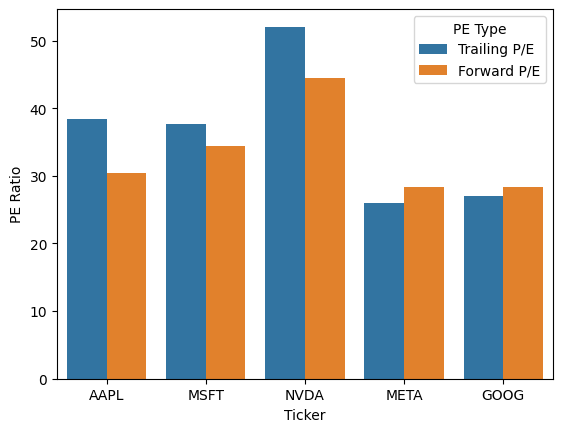

In [ ]:
plot_df = pe_df.stack().reset_index()
plot_df.columns = ['Ticker', 'PE Type', 'PE Ratio']
sns.barplot(
    data=plot_df,
    x='Ticker',
    y='PE Ratio',
    hue='PE Type'
)

In [ ]:
#Freecashflows
#Free cash flow = operating cf - investing cf
#Measure how much cash the company has left to paying dividends, buy back shares & debts, etc.
#reflecting how comfortable a company is; how much flexibility the company has
freecashflow = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  icf = cf.loc['Cash Flow From Continuing Investing Activities']
  fcf = []
  for i,j in zip(opc, icf):
    k = i - j
    fcf.append(k)
  freecashflow.append(fcf)
df_fcf = pd.DataFrame(freecashflow, columns=['2025','2024','2023','2022','2021'])
df_fcf.index = tickers
df_fcf.T.dropna()

,AAPL,MSFT,NVDA,META,GOOG
2025,1.153190e+11,2.087610e+11,8.451000e+10,1.384780e+11,1.708350e+11
2024,1.068380e+11,2.155180e+11,3.865600e+10,9.560800e+10,1.288090e+11
2023,1.445050e+11,1.102620e+11,-1.735000e+09,7.944500e+10,1.117930e+11
2022,1.185830e+11,1.193460e+11,1.893800e+10,6.525300e+10,1.271750e+11


Text(0.5, 0, 'Year')

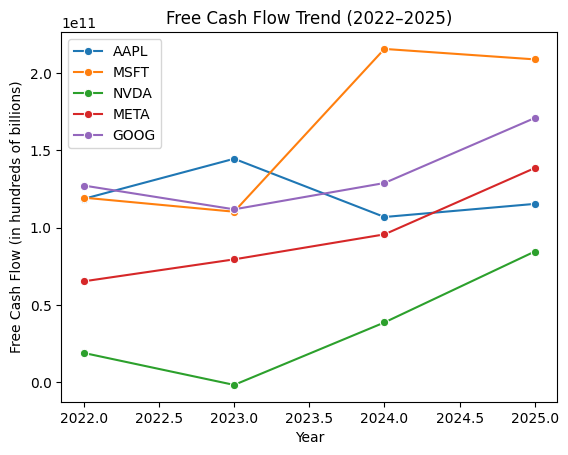

In [ ]:
df_transposed = df_fcf.transpose()
df_transposed.index = df_transposed.index.astype(int) # Converts the year strings to numbers (e.g., '2022' becomes 2022)
df_transposed.sort_index(ascending=True, inplace=True)
sns.lineplot(data=df_transposed, dashes=False, marker='o')
plt.title('Free Cash Flow Trend (2022–2025)')
plt.ylabel('Free Cash Flow (in hundreds of billions)')
plt.xlabel('Year')

In [ ]:
#cash conversion ratio
#cash conversion ratio = opc/net income
#How much earnings the company actually receive from net income
#Reflect how true the company's income is
cash_conversion_ratio = []
for ticker in tickers:
  ticker = yf.Ticker(ticker)
  incomestatment = ticker.financials
  net_income = incomestatment.loc['Net Income']
  cf = ticker.cashflow
  opc = cf.loc['Cash Flow From Continuing Operating Activities']
  ccr = []
  for i,j in zip(opc, net_income):
    k = i/j
    ccr.append(k)
  cash_conversion_ratio.append(ccr)
df_ccr = pd.DataFrame(cash_conversion_ratio, columns=['2025','2024','2023','2022','2021'])
df_ccr.index = tickers
df_ccr.T.dropna()


,AAPL,MSFT,NVDA,META,GOOG
2025,1.261564,1.337124,0.879377,1.464529,1.251513
2024,1.139677,1.345058,0.943884,1.818840,1.378765
2023,1.223921,1.210348,1.291209,2.175647,1.525629
2022,1.098838,1.224051,0.933962,1.465151,1.205424


Text(0.5, 0, 'Year')

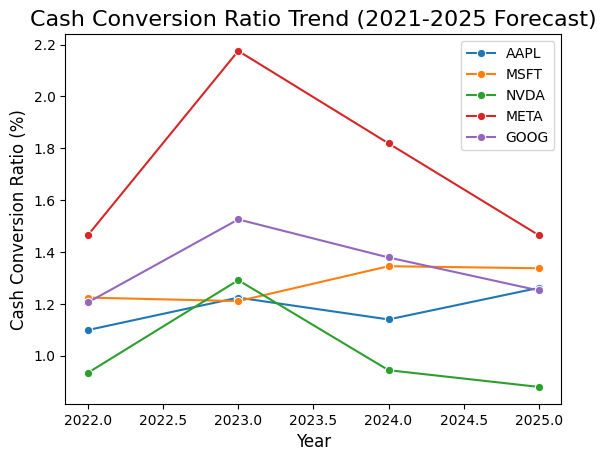

In [ ]:
ccr_plot = df_ccr.transpose()
ccr_plot.index = ccr_plot.index.astype(int)
ccr_plot.sort_index(ascending=True, inplace=True)
sns.lineplot(
    data=ccr_plot,
    dashes=False,
    marker='o',
)

plt.title('Cash Conversion Ratio Trend (2021-2025 Forecast)', fontsize=16)
plt.ylabel('Cash Conversion Ratio (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)

In [ ]:
#Total Revenue
#Revenue growth reflects market demand and pricing power, possibly indicating a company's advantage in the industry
total_revenue = []
for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income_statement = ticker.financials
    tr = income_statement.loc['Total Revenue']
    total_revenue.append(tr.values)
df_tr = pd.DataFrame(
    total_revenue,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_tr = df_tr.T
df_tr.dropna()

,AAPL,MSFT,NVDA,META,GOOG
2025,3.910350e+11,2.817240e+11,1.304970e+11,1.645010e+11,3.500180e+11
2024,3.832850e+11,2.451220e+11,6.092200e+10,1.349020e+11,3.073940e+11
2023,3.943280e+11,2.119150e+11,2.697400e+10,1.166090e+11,2.828360e+11
2022,3.658170e+11,1.982700e+11,2.691400e+10,1.179290e+11,2.576370e+11


In [109]:
#Revenue growth rate
growth_data = {}

for ticker in tickers:
    t = yf.Ticker(ticker)
    income = t.financials
    revenue = income.loc['Total Revenue']
    rev = list(revenue[::-1])#convert pandas series to list, flip its order so the first data is 2022 instead of 2025
    rev = rev[-4:]
    # Growth rates for the 3-year span, as growth rate for the first year, 2022, can not be computed
    rgr_2023 = ((rev[1] - rev[0]) / rev[0]) * 100
    rgr_2024 = ((rev[2] - rev[1]) / rev[1]) * 100
    rgr_2025 = ((rev[3] - rev[2]) / rev[2]) * 100

    growth_data[ticker] = [rgr_2023, rgr_2024, rgr_2025]
df_revenue_growth_rate = pd.DataFrame(growth_data, index=[2023, 2024, 2025]).round(2)
df_revenue_growth_rate


,AAPL,MSFT,NVDA,META,GOOG
2023,7.79,6.88,0.22,-1.12,9.78
2024,-2.80,15.67,125.85,15.69,8.68
2025,2.02,14.93,114.20,21.94,13.87


In [ ]:
#EPS
#EPS Growth is significant to investors as they hold the company's stock and may benefit from increase in dividends paid due to EPS increases, also meaning that the price of shares itself would likely increase
EPS = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    EPS.append(eps.values)
df_eps = pd.DataFrame(
    EPS,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_eps = df_eps.T
df_eps.dropna()

,AAPL,MSFT,NVDA,META,GOOG
2025,6.08,13.64,2.940,23.86,8.04
2024,6.13,11.80,1.190,14.87,5.80
2023,6.11,9.68,0.174,8.59,4.56
2022,5.61,9.65,0.385,13.77,5.61


In [108]:
#EPS growth rate
eps_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    eps = income_statement.loc['Diluted EPS']
    eps = list(eps[::-1])
    eps = eps[-4:]
    g_2023 = ((eps[1] - eps[0]) / eps[0]) * 100
    g_2024 = ((eps[2] - eps[1]) / eps[1]) * 100
    g_2025 = ((eps[3] - eps[2]) / eps[2]) * 100
    eps_growth.append([g_2023, g_2024, g_2025])
df_eps_growth = pd.DataFrame(
    eps_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_eps_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,8.912656,0.310881,-54.805195,-37.618010,-18.716578
2024,0.327332,21.900826,583.908046,73.108265,27.192982
2025,-0.815661,15.593220,147.058824,60.457297,38.620690


In [105]:
#Net income
net_income = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    net_income.append(ni.values)
df_ni = pd.DataFrame(
    net_income,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_ni = df_ni.T
df_ni.dropna()

,AAPL,MSFT,NVDA,META,GOOG
2025,9.373600e+10,1.018320e+11,7.288000e+10,6.236000e+10,1.001180e+11
2024,9.699500e+10,8.813600e+10,2.976000e+10,3.909800e+10,7.379500e+10
2023,9.980300e+10,7.236100e+10,4.368000e+09,2.320000e+10,5.997200e+10
2022,9.468000e+10,7.273800e+10,9.752000e+09,3.937000e+10,7.603300e+10


In [106]:
#Net income growth rate
ni_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    income_statement = t.financials
    ni = income_statement.loc['Net Income']
    ni = list(ni[::-1])
    ni = ni[-4:]
    g_2023 = ((ni[1] - ni[0]) / ni[0]) * 100
    g_2024 = ((ni[2] - ni[1]) / ni[1]) * 100
    g_2025 = ((ni[3] - ni[2]) / ni[2]) * 100
    ni_growth.append([g_2023, g_2024, g_2025])
df_ni_growth = pd.DataFrame(
    ni_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_ni_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,5.410858,-0.518299,-55.209188,-41.071882,-21.123723
2024,-2.813543,21.800417,581.318681,68.525862,23.049090
2025,-3.359967,15.539621,144.892473,59.496649,35.670438


In [103]:
#operating cash flow
#the cash generated from the company's core business operation
#key indicator to how well the company's business is going
OPC = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    OPC.append(opc.values)
df_opc = pd.DataFrame(
    OPC,
    columns=['2025', '2024', '2023', '2022', '2021'],
    index=tickers)
df_opc = df_opc.T
df_opc.dropna()


,AAPL,MSFT,NVDA,META,GOOG
2025,1.182540e+11,1.361620e+11,6.408900e+10,9.132800e+10,1.252990e+11
2024,1.105430e+11,1.185480e+11,2.809000e+10,7.111300e+10,1.017460e+11
2023,1.221510e+11,8.758200e+10,5.640000e+09,5.047500e+10,9.149500e+10
2022,1.040380e+11,8.903500e+10,9.108000e+09,5.768300e+10,9.165200e+10


In [102]:
#operating cash flow growth rate
opc_growth = []
for ticker in tickers:
    t = yf.Ticker(ticker)
    cashflow = t.cashflow
    opc = cashflow.loc['Cash Flow From Continuing Operating Activities']
    opc = list(opc[::-1])
    opc = opc[-4:]
    g_2023 = ((opc[1] - opc[0]) / opc[0]) * 100
    g_2024 = ((opc[2] - opc[1]) / opc[1]) * 100
    g_2025 = ((opc[3] - opc[2]) / opc[2]) * 100
    opc_growth.append([g_2023, g_2024, g_2025])
df_opc_growth = pd.DataFrame(
    opc_growth,
    columns=['2023', '2024', '2025'],
    index=tickers).T
df_opc_growth

,AAPL,MSFT,NVDA,META,GOOG
2023,17.409985,-1.631942,-38.076416,-12.495883,-0.171300
2024,-9.502992,35.356580,398.049645,40.887568,11.203891
2025,6.975566,14.858117,128.155927,28.426589,23.148822


In [124]:
# ROIC = NOPAT / Invested Capital
# where NOPAT = EBIT * (1 - Tax Rate)
# Same logic structure as cash_conversion_ratio loop

roic_ratio = []

for ticker in tickers:
    ticker = yf.Ticker(ticker)
    income = ticker.financials
    balance = ticker.balance_sheet

    ebit = income.loc['Operating Income']
    tax_rate = income.loc['Tax Rate For Calcs']
    invested_capital = balance.loc['Invested Capital']


    roic_each = []
    for e, t, ic in zip(ebit, tax_rate, invested_capital):
          nopat = e * (1 - t)
          roic_each.append((nopat / ic) * 100)
    roic_ratio.append(roic_each)

df_roic = pd.DataFrame(roic_ratio, columns=['2025', '2024', '2023', '2022', '2021'])
df_roic.index = tickers
df_roic = df_roic.T.dropna()

df_roic


,AAPL,MSFT,NVDA,META,GOOG
2025,57.171730,27.392358,80.441680,28.937999,27.966449
2024,56.281534,27.964460,55.071194,22.455348,24.581378
2023,58.619901,28.289920,13.329189,17.178271,23.398471
2022,50.295131,33.496127,26.226692,31.186388,24.940480


In [ ]:
#Dividends

all_tickers_data = yf.Tickers(tickers)
dividends_data = {}

for ticker in tickers:
    ticker_object = all_tickers_data.tickers[ticker]

    divs = ticker_object.dividends
    divs_df = divs.reset_index()
    divs_df = divs_df.rename(columns={'Dividends': 'Dividend Amount'})

    divs_df['Ticker'] = ticker

    dividends_data[ticker] = divs_df
master_dividends_db = pd.concat(dividends_data.values(), ignore_index=True)

master_dividends_db = master_dividends_db[['Ticker', 'Date', 'Dividend Amount']]

master_dividends_db['Date'] = master_dividends_db['Date'].dt.tz_localize(None)   #Apply boolean indexing to filter the rows by date range
master_dividends_db = master_dividends_db[
    (master_dividends_db['Date'] >= pd.to_datetime('2021-01-01')) &
    (master_dividends_db['Date'] <= pd.to_datetime('2025-12-31'))
]
master_dividends_db

In [ ]:
#stock: high and lows

stock_data = yf.download(tickers, start="2021-01-01", end="2025-04-30", group_by='tickers')
monthly_last_value = stock_data.resample('M').last()
monthly_last_value